In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as sts
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
path = "dados_desafiodatascientistintern_vendas_distribuidoras_anp.xlsx"
diesel = pd.read_excel(path, 0)
gasolina = pd.read_excel(path, 1)
etanol = pd.read_excel(path, 2)

In [3]:
diesel.head()

,regiao,meses,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,df,1,23310.896,29319.999,30934.830,29295.326,24360.754,27745.916,28110.059,26414.443740,...,27775.156551,27828.123770,31349.982,33989.250,35430.273169,28797.050,27828.534246,26758.416,27481.500,28437.000
1,df,2,25967.743,27720.714,27585.412,28328.216,23477.298,27132.401,26344.263,25573.618074,...,29603.591990,31540.083628,30453.300,34968.900,31957.200000,31339.200,27313.777397,25848.095,29089.500,30150.000
2,df,3,24590.674,32149.816,32724.180,28047.691,30092.094,31146.971,31039.292,31875.141129,...,32997.908444,36202.519600,34267.700,35642.943,37278.568265,34351.200,33516.663013,32373.071,29682.500,29206.000
3,df,4,24975.963,32156.821,33863.218,31787.357,29433.731,31062.637,28794.417,30286.788490,...,33374.872798,33602.215777,36087.800,36848.905,36476.001000,32500.850,28361.689945,30314.696,30781.429,22863.382
4,df,5,27224.597,34122.639,34484.371,32476.371,30442.965,31339.791,32818.387,32274.266232,...,34268.977950,36364.245354,36738.123,39003.000,36793.025000,32512.108,31433.943013,29546.745,31945.500,25737.500


In [4]:
def transforma_base(base):
    base_nova = base.set_index(['regiao', 'meses']).transpose().stack()
    base_nova = base_nova.reset_index().rename(columns = {'level_0':'anos'}, inplace = False)
    base_nova["data"] = base_nova['anos'].astype(str) +"-"+ base_nova["meses"].astype(str)
    base_nova = base_nova.drop(['anos', 'meses'], axis=1)
    colunas = ['data', 'df', 'go', 'ma', 'mg', 'mt', 'pa', 'sp', 'to', 'br']
    base_nova = base_nova.reindex(columns=colunas)
    base_nova["data"] = pd.to_datetime(base_nova['data'])
    base_nova.set_index('data', inplace=True)
    return base_nova

In [5]:
diesel_novo = transforma_base(diesel)
gasolina_novo = transforma_base(gasolina)
etanol_novo = transforma_base(etanol)

In [6]:
diesel_novo.head()

regiao,df,go,ma,mg,mt,pa,sp,to,br
data,,,,,,,,,
2000-01-01,23310.896,87944.946,46337.618,314501.824,103352.364,78637.609,594406.648,26250.620,2562814.939
2000-02-01,25967.743,101610.021,47762.196,342265.747,129045.770,86689.774,671903.264,27309.824,2851462.374
2000-03-01,24590.674,106700.403,45887.571,346959.228,140906.429,72641.028,647752.548,24847.765,2795766.194
2000-04-01,24975.963,107564.004,44513.438,355990.573,138921.684,72608.689,663193.902,25427.129,2850547.888
2000-05-01,27224.597,108798.652,51793.296,372540.499,132113.953,83180.820,703252.142,28248.445,2917605.671


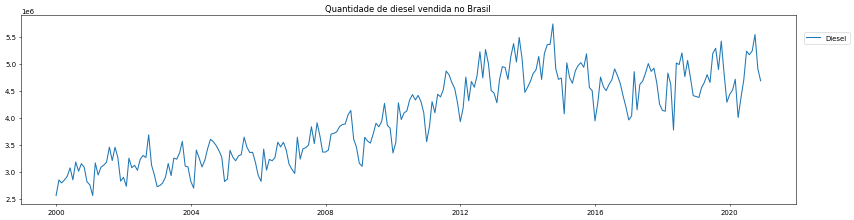

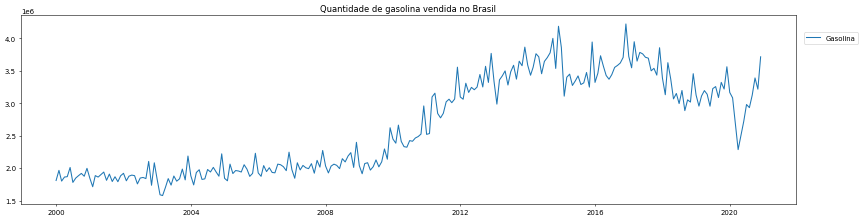

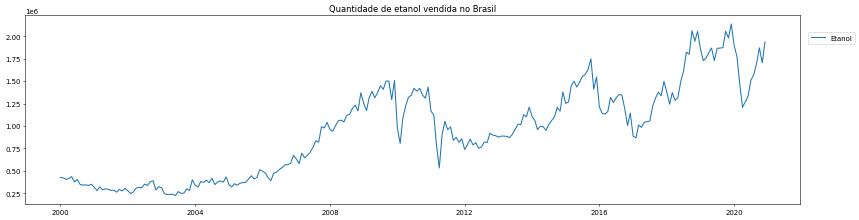

In [7]:
analise_diesel = diesel_novo[['br']].copy()
analise_gasolina = gasolina_novo[['br']].copy()
analise_etanol = etanol_novo[['br']].copy()

plt.figure(figsize=(20, 5), dpi=50)
plt.plot(analise_diesel, label="Diesel")
plt.legend(loc=(1.01,0.85))
plt.title('Quantidade de diesel vendida no Brasil')
plt.show()

plt.figure(figsize=(20, 5), dpi=50)
plt.plot(analise_gasolina, label="Gasolina")
plt.legend(loc=(1.01,0.85))
plt.title('Quantidade de gasolina vendida no Brasil')
plt.show()

plt.figure(figsize=(20, 5), dpi=50)
plt.plot(analise_etanol, label="Etanol")
plt.legend(loc=(1.01,0.85))
plt.title('Quantidade de etanol vendida no Brasil')
plt.show()

In [8]:
#Ao plotar a quantidade vendida de cada combustível nos gráficos, vê-se claramente que o diesel possui algum tipo de sazonalidade. De forma menos explícita, mas ainda possível de ser vista, a gasolina parece ter também algum componente sazonal. O etanol, por outro lado, não aparenta, num primeiro momento ter sazonalidade marcada em suas vendas.

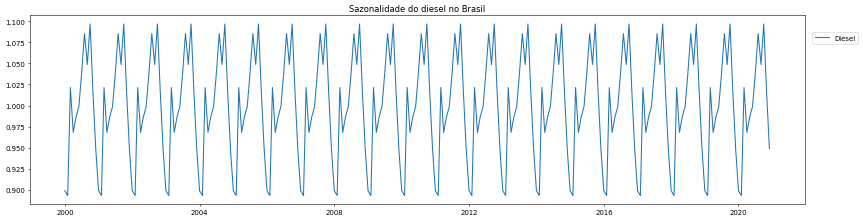

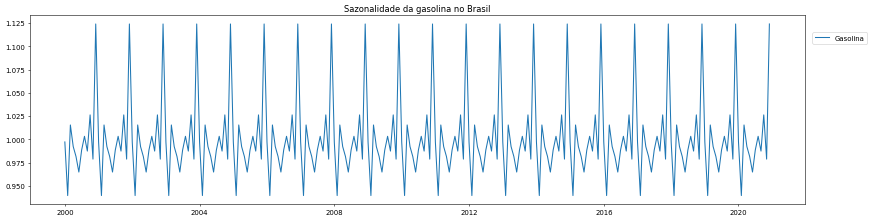

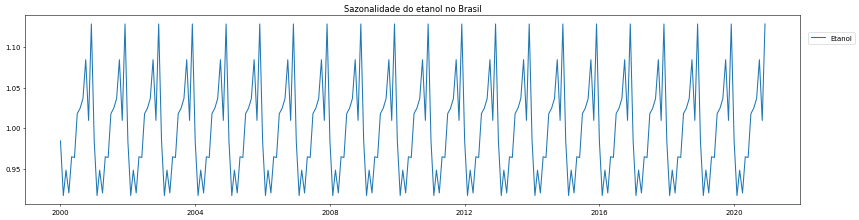

In [9]:
analise_diesel = diesel_novo[['br']].copy()
analise_gasolina = gasolina_novo[['br']].copy()
analise_etanol = etanol_novo[['br']].copy()

decomp_result_diesel = seasonal_decompose(analise_diesel, model="multiplicative")
decomp_result_gasolina = seasonal_decompose(analise_gasolina, model="multiplicative")
decomp_result_etanol = seasonal_decompose(analise_etanol, model="multiplicative")

seasonal_diesel = decomp_result_diesel.seasonal
seasonal_gasolina = decomp_result_gasolina.seasonal
seasonal_etanol = decomp_result_etanol.seasonal

plt.figure(figsize=(20, 5), dpi=50)
plt.plot(seasonal_diesel, label="Diesel")
plt.legend(loc=(1.01,0.85))
plt.title('Sazonalidade do diesel no Brasil')
plt.show()

plt.figure(figsize=(20, 5), dpi=50)
plt.plot(seasonal_gasolina, label="Gasolina")
plt.legend(loc=(1.01,0.85))
plt.title('Sazonalidade da gasolina no Brasil')
plt.show()

plt.figure(figsize=(20, 5), dpi=50)
plt.plot(seasonal_etanol, label="Etanol")
plt.legend(loc=(1.01,0.85))
plt.title('Sazonalidade do etanol no Brasil')
plt.show()

In [10]:
#Para uma análise mais apurada, realizei uma decomposição da sazonalidade dos combustíveis no Brasil e plotei o resultado dessa composição em gráficos para cada combustível. Percebe-se que todos os combustíveis analisados - diesel, gasolina e etanol - tem suas distinções quanto à sazonalidade. Contudo, há um comportamento próximo entre eles que é a queda das vendas no início de cada ano e o aumento delas nos últimos meses do ano.

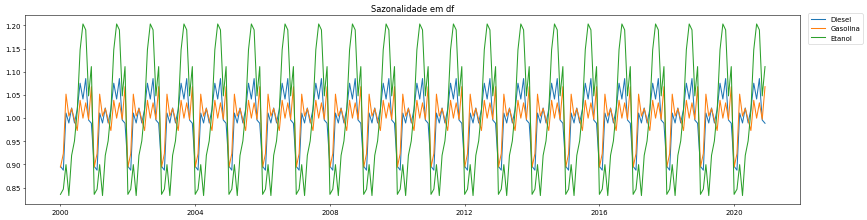

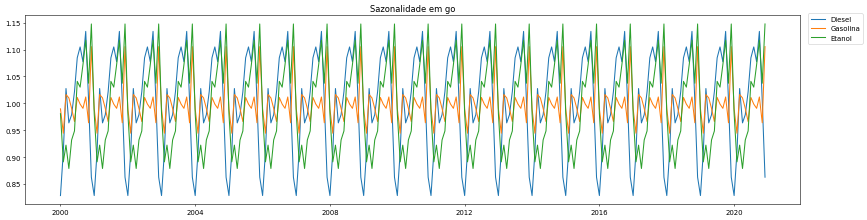

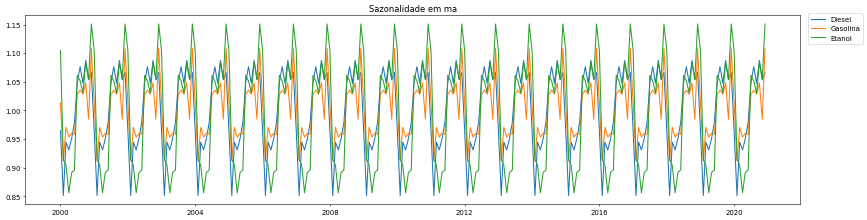

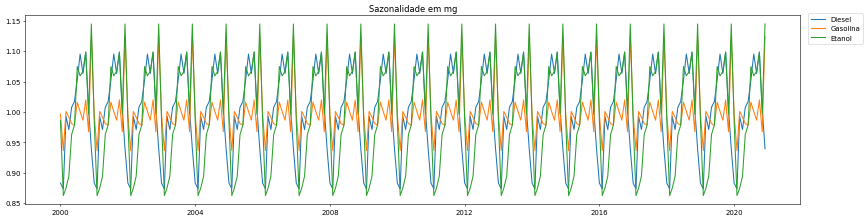

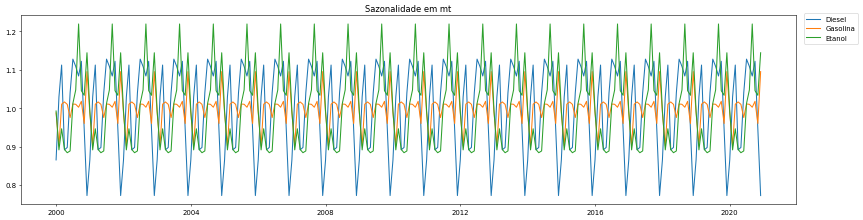

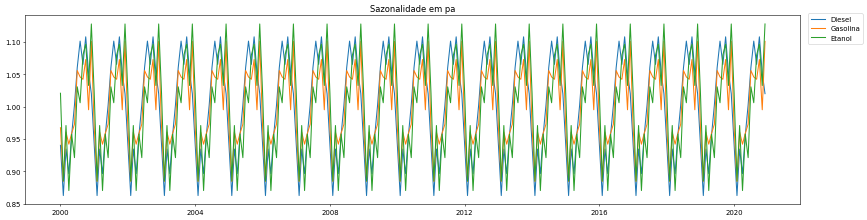

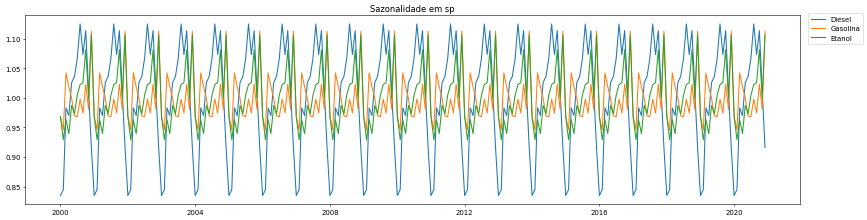

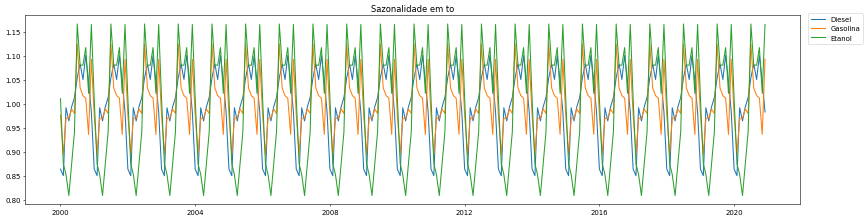

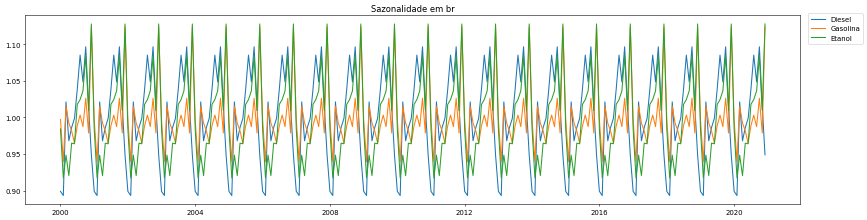

In [11]:
uf = ['df', 'go', 'ma', 'mg', 'mt', 'pa', 'sp', 'to', 'br']

for e in uf:    
    analise_diesel = diesel_novo[[e]].copy()
    analise_gasolina = gasolina_novo[[e]].copy()
    analise_etanol = etanol_novo[[e]].copy()

    decomp_result_diesel = seasonal_decompose(analise_diesel, model="multiplicative")
    decomp_result_gasolina = seasonal_decompose(analise_gasolina, model="multiplicative")
    decomp_result_etanol = seasonal_decompose(analise_etanol, model="multiplicative")
    
    seasonal_diesel = decomp_result_diesel.seasonal
    seasonal_gasolina = decomp_result_gasolina.seasonal
    seasonal_etanol = decomp_result_etanol.seasonal

    
    plt.figure(figsize=(20, 5), dpi=50)
    plt.plot(seasonal_diesel, label="Diesel")
    plt.plot(seasonal_gasolina, label="Gasolina")
    plt.plot(seasonal_etanol, label="Etanol")
    plt.legend(loc=(1.01,0.85))
    plt.title('Sazonalidade em ' + e)
    plt.show()

In [12]:
#Ao olhar a decomposição da sazonalidade da venda dos três combustíveis no Brasil plotadas em conjunto (último gráfico), o comprotamento discutido acima - de queda das vendas no início do ano e elevação no final do ano - pode ser visto nas três séries de forma comparada.
#A sazonalidade se diferencia entre cada Unidade Federativa quanto a intensidade e existem algumas distinções, como por exemplo os dois picos de venda no etanol no Tocantins, que ocorrem entre julho-agosto e depois novamente em dezembro. Contudo, todos os combustíveis aparentam ter sazonalidade em algum nível nas uf's e algo próximo do comportamento nacional já informado parece se repetir nas vendas de cada Unidade Federativa.

In [13]:
def transforma_base2(base):
    base_novo = base.set_index(['regiao', 'meses']).transpose().stack()
    base_novo = base_novo.reset_index().rename(columns = {'level_0':'anos'}, inplace = False)
    return base_novo

In [14]:
diesel_novo = transforma_base2(diesel)
gasolina_novo = transforma_base2(gasolina)
etanol_novo = transforma_base2(etanol)

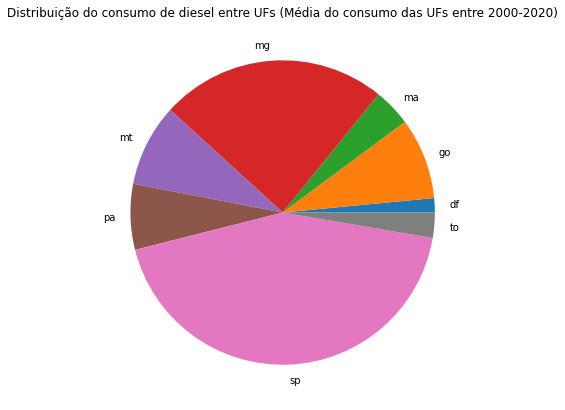

In [15]:
uf = ['df', 'go', 'ma', 'mg', 'mt', 'pa', 'sp', 'to']
media_diesel = list(diesel_novo.drop(['meses', 'anos', 'br'], axis=1).mean())
media_diesel

plt.figure(figsize =(10, 7))
plt.pie(media_diesel, labels = uf)
plt.title('Distribuição do consumo de diesel entre UFs (Média do consumo das UFs entre 2000-2020)')
plt.show()

In [16]:
#O gráfico acima revela que, na média, São Paulo é a Unidade Federativa que mais vende diesel, seguda de Minas Gerais. Ambas as regiões bem populosas e com o primeiro e terceiro maiores PIBs entre as UFs em 2020¹
#1 - Disponível em https://www.ibge.gov.br/explica/pib.php)

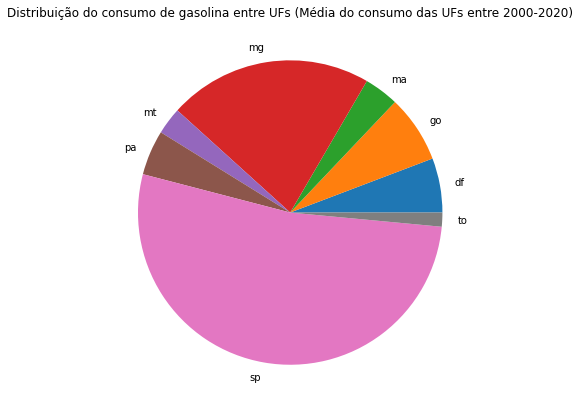

In [17]:
uf = ['df', 'go', 'ma', 'mg', 'mt', 'pa', 'sp', 'to']
media_gasolina = list(gasolina_novo.drop(['meses', 'anos', 'br'], axis=1).mean())
media_gasolina

plt.figure(figsize =(10, 7))
plt.pie(media_gasolina, labels = uf)
plt.title('Distribuição do consumo de gasolina entre UFs (Média do consumo das UFs entre 2000-2020)')
plt.show()

In [18]:
#O comportamento das vendas de gasolina por UF também mantem São Paulo e Minas como as UFs com as maiores vendas. Destaca-se que as parcela das vendas de São Paulo e do Distríto Federal são maiores nas vendas de gasolina em relação às vendas de diesel. Já Mato Grosso, Pará e Tocantins perdem importância relativa nas vendas se comparadas as vendas de gasolina com as de diesel.


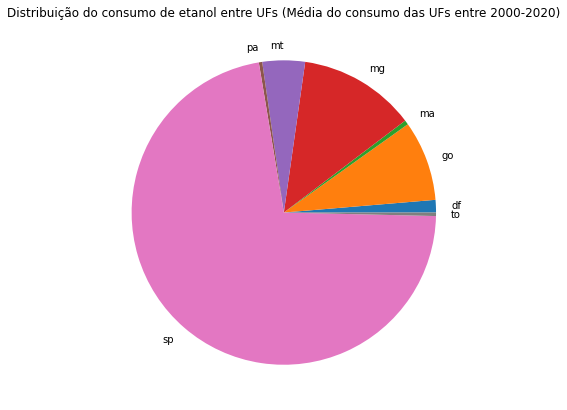

In [19]:
uf = ['df', 'go', 'ma', 'mg', 'mt', 'pa', 'sp', 'to']
media_etanol = list(etanol_novo.drop(['meses', 'anos', 'br'], axis=1).mean())
media_etanol

plt.figure(figsize =(10, 7))
plt.pie(media_etanol, labels = uf)
plt.title('Distribuição do consumo de etanol entre UFs (Média do consumo das UFs entre 2000-2020)')
plt.show()

In [20]:
#Ao olhar a média das vendas do etanol, observa-se a expressiva participação de São Paulo nas vendas totais - acima de 70%. Ademais, Minas continua como a segunda UF que mais vende.